In [1]:
import numpy as np
import matplotlib.pyplot as plt
def d_s(rho):
    alpha = np.pi/2 - 1
    return (1 - rho) * (1 - alpha * rho + (alpha * (2 * alpha  - 1))/(2 * alpha + 1) * rho**2)

In [2]:
def f(mu, b):
    rho = np.linspace(0, 1, 10000)
    curve = b * d_s(rho) * rho + mu - np.log(1 - rho)

    zero_crossings = np.sum(np.diff(np.sign(curve)) != 0)

    return zero_crossings

def rho_min(mu, b):
    rho = np.linspace(0, 1, 10000)
    curve = b * d_s(rho) * rho + mu - np.log(1 - rho)

    zero_rho = rho[np.where(np.diff(np.sign(curve)) != 0)]
    return zero_rho

def f_rho(rho, mu, b):
    alpha = np.pi/2 - 1

    return (1 - rho) * np.log(1-rho) + rho * (1 + mu) - b * (
        alpha * (2 * alpha - 1) / (10 * alpha + 5) * rho**5 
        - alpha**2 / (2 * alpha  + 1) * rho**4
        + 1/3 * (alpha + 1) * rho**3
        - 1/2 * rho**2
    )
def f_at_minimum(mu, b):
    rhos = rho_min(mu, b)
    f_values = f_rho(rhos, mu, b)

    return f_values

def mu_crit(b):
    mu = np.linspace(-20, 0, 10000)
    free_energy_minima = [[f_at_minimum(mu_val, b)[0], f_at_minimum(mu_val, b)[-1]] for mu_val in mu]

    differences = [minima[0] - minima[1] for minima in free_energy_minima]
    mu_critical = mu[np.where(np.diff(np.sign(differences)) != 0)]
    return mu_critical

/var/folders/3q/bs71m3ns1kq5sjlny3rn8t5r0000gn/T/ipykernel_98936/2602255644.py:3: RuntimeWarning: divide by zero encountered in log
  curve = b * d_s(rho) * rho + mu - np.log(1 - rho)


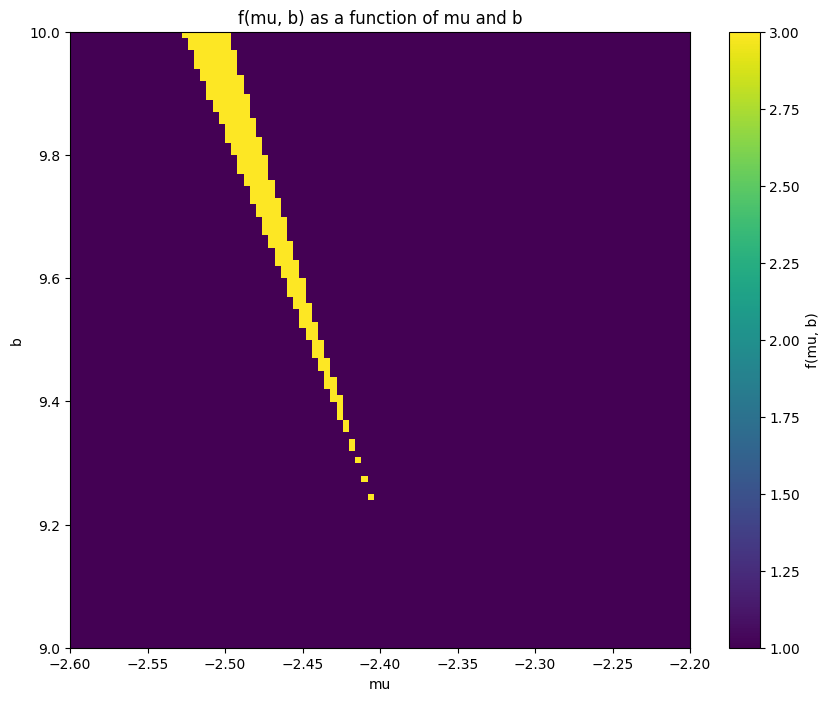

In [3]:

mu = np.linspace(-2.6, -2.2, 100)
b = np.linspace(9, 10, 100)

mu_grid, b_grid = np.meshgrid(mu, b)
z = np.vectorize(f)(mu_grid, b_grid)

plt.figure(figsize=(10, 8))
plt.imshow(z, extent=(mu.min(), mu.max(), b.min(), b.max()), origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='f(mu, b)')
plt.xlabel('mu')
plt.ylabel('b')
plt.title('f(mu, b) as a function of mu and b')
plt.show()

In [4]:
b_min = b[np.where(z == 3)[0].min()]
print(f"The minimum value of b such that there are 3 solutions is: {b_min}")

mu_max = mu[np.where(z == 3)[1].max()]
print(f"The critical value of mu such that there are 3 solutions is: {mu_max}")

Pe_min = np.sqrt(2 * b_min)
print(f"The critical value of Pe is: {Pe_min}")

The minimum value of b such that there are 3 solutions is: 9.242424242424242
The critical value of mu such that there are 3 solutions is: -2.4060606060606062
The critical value of Pe is: 4.2994009448815635


/var/folders/3q/bs71m3ns1kq5sjlny3rn8t5r0000gn/T/ipykernel_98936/2602255644.py:11: RuntimeWarning: divide by zero encountered in log
  curve = b * d_s(rho) * rho + mu - np.log(1 - rho)
/var/folders/3q/bs71m3ns1kq5sjlny3rn8t5r0000gn/T/ipykernel_98936/2602255644.py:19: RuntimeWarning: divide by zero encountered in log
  return (1 - rho) * np.log(1-rho) + rho * (1 + mu) - b * (
/var/folders/3q/bs71m3ns1kq5sjlny3rn8t5r0000gn/T/ipykernel_98936/2602255644.py:19: RuntimeWarning: invalid value encountered in multiply
  return (1 - rho) * np.log(1-rho) + rho * (1 + mu) - b * (


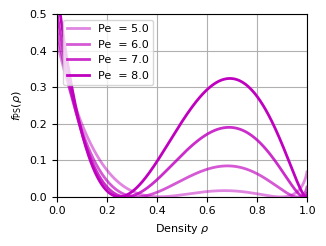

In [5]:
plt.rcParams.update({'font.size': 8})

rho = np.linspace(0, 1, 1000)
plt.figure(figsize=(3.3, 2.5))

for Pe in np.linspace(4, 8, 5):
    b = Pe**2 / 2
    critical_bs = mu_crit(b)
    if len(critical_bs) == 3:
        mu = critical_bs[1]
        f_1 = f_rho(rho, mu, b)
        zero_rho = rho_min(mu, b)
        f_critical = f_rho(zero_rho, mu, b)

        plt.plot(rho, f_1 - f_critical[0], label=f'Pe  = {Pe:.1f}', linewidth=2, color='m', alpha=0.3 + 0.7 * (Pe-4)/4)

plt.xlim(0, 1)
plt.ylim(0, 0.5)
plt.xlabel(r'Density $\rho$')
plt.ylabel(r'$f_\text{PS}(\rho)$')
plt.grid()
plt.tight_layout()
plt.legend(loc = 'upper left')
#plt.savefig('f_PS_plot.pdf', bbox_inches='tight')
